In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
#from matplotlib import pyplot as plt
#import sncosmo
from sntd import plotting, io, simulation, fitting

In [4]:
# Test 1 : simulate a doubly-imaged Type Ib SN and fit for time delays
modname = 'snana-2004gv'
snType = 'Ib'
lcs = simulation.createMultiplyImagedSN(
    modname, snType, .1, bands=['bessellb', 'bessellv', 'bessellr'],
    zp=27., cadence=5., epochs=15., mjdRange=[0,100.], time_delays=[0., 15.],
    magnifications=[1.,5.], objectName='Test', telescopename='HST',
    microlensing=False)
ifig = 0
print("Simulated strongly lensed SN \n")

Simulated strongly lensed SN 



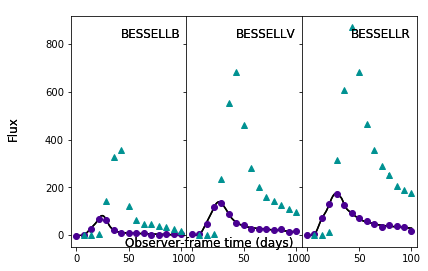

image S1 t0=25.0
image S2 t0=40.0


In [6]:
lcs.plot_lightcurve(bands=['bessellb', 'bessellv', 'bessellr'],
                    showmodel='sim', showfig=True)
for k in lcs.images.keys():
    print("image {} t0={}".format(k, lcs.images[k].simMeta['t0']))

In [ ]:
lcs_tdfit=fitting.fit_data(lcs, snType='Ib', models=['snana-2004gv'],
                            params=['amplitude','t0'],
                            combined_or_separate='separate',
                            method='minuit')

In [ ]:
# TODO: make this more general, i.e. use keywords list instead of s1 and s2.
t0_s1 = lcs_tdfit.images['S1'].fits.model.get('t0')
t0_s2 = lcs_tdfit.images['S2'].fits.model.get('t0')
A_s1 = lcs_tdfit.images['S1'].fits.model.get('amplitude')
A_s2 = lcs_tdfit.images['S2'].fits.model.get('amplitude')
lcs_combined = lcs.combine_curves(tds={'S1':1,'S2':t0_s2-t0_s1},
                                  mus={'S1':1,'S2':A_s2/A_s1})

In [ ]:
lcs.plot_lightcurve(bands=['bessellb', 'bessellv', 'bessellr'],
                    combined=True, showmodel='fit', showfig=True)